Imports

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import eesr

# Functions

In [7]:
# Creates a dataframe with the results of the experiments based on the parameters.
def create_dataframe(path_ex, file_name, dcs = '', tpp = ''):
    select_dcs = "dcs_" + dcs
    select_tpp = "tpp_" + tpp
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (select_dcs in folder) & (select_tpp in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            if '.tsv' in file_name:
              data = pd.read_csv(file_path, delimiter='\t')
            else:
              data = pd.read_csv(file_path, delimiter=',')
            data['trace_name'] = folder
            df = pd.concat([df, data])

    return df

# Creates a dataframe with the environment stats of the specified file.
def create_env_dataframe(path_ex, trace_name):
    file_name = 'environment.csv'
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (trace_name in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            data = pd.read_csv(file_path)
            data['trace_name'] = folder
            df = pd.concat([df, data])
    return df

# Splits the environment dataframe into a dataframe for each environment and writes it to a csv file.
# def split_env_dataframe(df, path_ex):



# Variables

Experiment paths

In [8]:
path_ex1 = '../EX_1/'
path_ex2 = '../EX_2'

Datacentre dependent dataframes

In [9]:
stats_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='')
stats_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='')

summary_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='')
summary_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='')

tasks_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='')
tasks_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='')

workflows_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='')
workflows_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='')

Fastest Machine Placement variables

In [10]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
stats_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='fastest_machine')

summary_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='fastest_machine')
summary_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='fastest_machine')

tasks_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='fastest_machine')
tasks_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='fastest_machine')

workflows_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='fastest_machine')
workflows_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='fastest_machine')

Look Ahead Placement variables

In [11]:
stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
stats_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='look_ahead')

summary_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='look_ahead')
summary_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='look_ahead')

tasks_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='look_ahead')
tasks_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='look_ahead')

workflows_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='look_ahead')
workflows_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='look_ahead')

# Exploration

In [12]:
stats_dc1_df[stats_dc1_df['trace_name'] == 'askalon-new_ee68_parquet_tpp_look_ahead_dcs_1']

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,1978356317,10785263,0.01,0.000009,askalon-new_ee68_parquet_tpp_look_ahead_dcs_1


In [13]:
stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.1]

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,5348902,2106293456,393.78,0.683647,spec_trace-1_parquet_tpp_fastest_machine_dcs_1
0,5348902,2106293456,393.78,0.683647,spec_trace-1_parquet_tpp_look_ahead_dcs_1
0,5403452,2325476523,430.37,0.747168,spec_trace-2_parquet_tpp_fastest_machine_dcs_1
0,5403452,2325476523,430.37,0.747168,spec_trace-2_parquet_tpp_look_ahead_dcs_1
0,338630,20009940,59.09,0.102588,workflowhub_epigenomics_dataset-ilmn_chameleon...
0,338630,20009940,59.09,0.102588,workflowhub_epigenomics_dataset-ilmn_chameleon...


In [14]:
stats_dc1_df.describe()

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage
count,1.760000e+02,1.760000e+02,176.000000,176.000000
mean,5.032061e+07,1.207853e+08,14.254773,0.024748
std,2.138286e+08,4.766883e+08,61.971333,0.107589
min,1.260320e+05,3.360170e+05,0.010000,0.000009
25%,4.880140e+06,4.275968e+06,0.592500,0.001030
50%,9.440690e+06,8.481290e+06,0.995000,0.001730
75%,2.034142e+07,1.593006e+07,2.232500,0.003879
max,1.978356e+09,2.977778e+09,430.370000,0.747168


C:\Users\Radu\AppData\Local\Temp\ipykernel_16852\3423918360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stats_dc1_df.corr(), annot=True)


<AxesSubplot: >

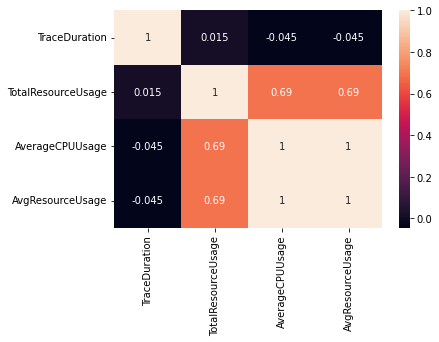

In [15]:
sns.heatmap(stats_dc1_df.corr(), annot=True)

<AxesSubplot: >

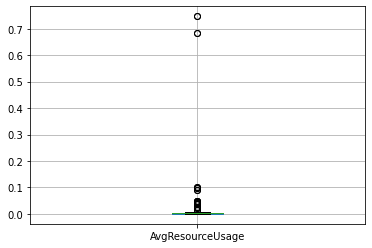

In [16]:
stats_dc1_df.boxplot(column=['AvgResourceUsage'])

In [17]:
stats_dc2_df[stats_dc2_df['AvgResourceUsage'] >= 0.03]

,TraceDuration,TotalResourceUsage,AverageCPUUsage,AvgResourceUsage,trace_name
0,5348902,2106293456,393.78,0.341823,spec_trace-1_parquet_tpp_fastest_machine_dcs_2
0,5348902,2106293456,393.78,0.341823,spec_trace-1_parquet_tpp_look_ahead_dcs_2
0,5403452,2325476523,430.37,0.373584,spec_trace-2_parquet_tpp_fastest_machine_dcs_2
0,5403452,2325476523,430.37,0.373584,spec_trace-2_parquet_tpp_look_ahead_dcs_2
0,323753,17110105,52.85,0.045876,workflowhub_epigenomics_dataset-hep_chameleon-...
0,323753,17110105,52.85,0.045876,workflowhub_epigenomics_dataset-hep_chameleon-...
0,242303,13447697,55.50,0.048177,workflowhub_epigenomics_dataset-hep_grid5000_s...
0,242303,13447697,55.50,0.048177,workflowhub_epigenomics_dataset-hep_grid5000_s...
0,338630,20009940,59.09,0.051294,workflowhub_epigenomics_dataset-ilmn_chameleon...
0,338630,20009940,59.09,0.051294,workflowhub_epigenomics_dataset-ilmn_chameleon...


In [18]:
baseline_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'fastest_machine')
lookahead_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'look_ahead')

lookahead_performance_dc1

,task.id,workflow.id,time.submit,time.ready,time.start,time.minimal.starttime,time.complete,time.runtime.original,time.runtime.actual,energy.consumed,trace_name
0,0,0,2930096,2930096,2930096,2930096,2950077,13022,19981,0.011114,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
1,1,0,2948527,2948527,2948527,2948527,2968398,12950,19871,0.011053,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
2,2,0,2989836,2989836,2989836,2989836,2992324,1621,2488,0.001384,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
3,3,0,3010600,3010600,3010600,3010600,3012245,1645,1645,0.001606,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
4,4,0,2935120,2935120,2935120,2935120,2955072,13003,19952,0.011098,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
...,...,...,...,...,...,...,...,...,...,...,...
747,747,0,0,6004,6004,6004,6261,167,257,0.000143,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
748,748,0,0,233632,233632,233632,312080,78448,78448,0.076609,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
749,749,0,0,233426,233426,233426,321547,88121,88121,0.086056,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
750,750,0,0,67732,67732,67732,200317,132585,132585,0.129478,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


# Validation

In [19]:
print(tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].describe())
tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].describe()

count      88.000000
mean      117.954438
std       466.851651
min         0.328142
25%         4.175750
50%         8.282509
75%        15.556696
max      2907.986604
Name: energy.consumed, dtype: float64


count      88.000000
mean      115.518984
std       462.291324
min         0.320143
25%         3.725695
50%         7.285628
75%        13.659754
max      2886.460643
Name: energy.consumed, dtype: float64

-2.064741048953515 %
Baseline:  10379.990526367186
Lookahead:  10165.670601091797


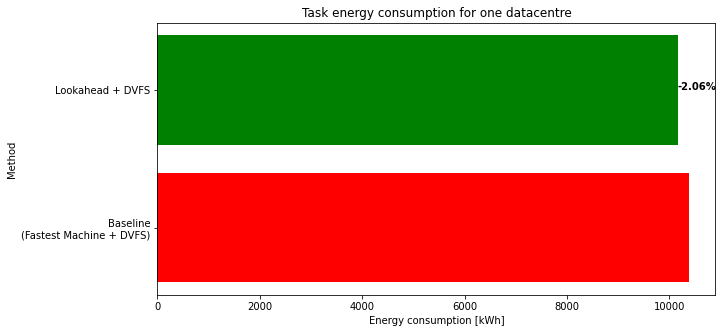

In [20]:
bl = tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].sum()
nl = tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].sum()

difference_percentage = (nl - bl) / bl * 100
print(difference_percentage, '%')
print('Baseline: ', bl)
print('Lookahead: ', nl)

# plot the results in a horizontal bar chart with difference percentage
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh('Baseline\n(Fastest Machine + DVFS)', bl, color='red')
ax.barh('Lookahead + DVFS', nl, color='green')
ax.set_title('Task energy consumption for one datacentre')
ax.set_xlabel('Energy consumption [kWh]')
ax.set_ylabel('Method')
# ax.text(bl, 0, str(round(bl, 2)), color='black', fontweight='bold')
ax.text(nl, 1, str(round(difference_percentage, 2))+'%', color='black', fontweight='bold')
plt.show()



In [21]:
# workflow_delays[ttp][dvfs_enabled][domain].extend(workflow_df['time.complete'] - workflow_df['time.earliest.complete'])
workflows_dc1_fmp_df['workflow_delays'] = workflows_dc1_fmp_df['time.complete'] - workflows_dc1_fmp_df['time.earliest.complete']
workflows_dc1_lah_df['workflow_delays'] = workflows_dc1_lah_df['time.complete'] - workflows_dc1_lah_df['time.earliest.complete']

9.611231464237223 %
Baseline:  642484350
Lookahead:  704235008


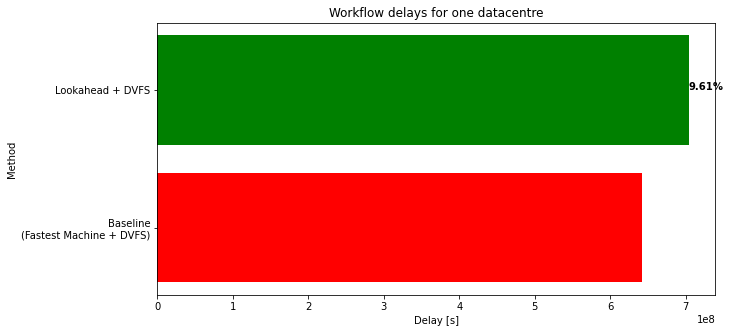

In [22]:
# calculate cumulative workflow delays
total_delay_fmp = workflows_dc1_fmp_df['workflow_delays'].sum()
total_delay_lah = workflows_dc1_lah_df['workflow_delays'].sum()

# calculate the percentage of delay
delay_percentage = (total_delay_lah - total_delay_fmp) / total_delay_fmp * 100
print(delay_percentage, '%')
print('Baseline: ', total_delay_fmp)
print('Lookahead: ', total_delay_lah)

# plot the results in a horizontal bar chart with difference percentage
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh('Baseline\n(Fastest Machine + DVFS)', total_delay_fmp, color='red')
ax.barh('Lookahead + DVFS', total_delay_lah, color='green')
ax.set_title('Workflow delays for one datacentre')
ax.set_xlabel('Delay [s]')
ax.set_ylabel('Method')
# ax.text(bl, 0, str(round(bl, 2)), color='black', fontweight='bold')
ax.text(total_delay_lah, 1, str(round(delay_percentage, 2))+'%', color='black', fontweight='bold')
plt.show()


# Experiment 1

**Process**:
1. Select from the 1 DC runs:
    * a) one representative trace for each target utilization in increments of 10%
    * b) one trace with average, shortest and longest running times
2. Compute utilization graphs for 
    * a) fastest machine placement (fmp)
    * b) lookahead (lah) placement
    * c) compare fmp in 1 DC vs 2 DC
    * d) compare lah in 1 DC vs 2 DC
3. Calculate total energy consumption (including idle consumption) for each trace
4. Select the corresponding traces from the 2 DC runs
5. Run the DCs in different country configurations and show the results from EESR

1.a)

In [23]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
utilization_candidates_fmp = stats_dc1_fmp_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]
utilization_candidates_fmp['AvgResourceUsage'] = utilization_candidates_fmp['AvgResourceUsage'].apply(lambda x: round(x, 3))
print(utilization_candidates_fmp)

stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
utilization_candidates_lah = stats_dc1_lah_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]
utilization_candidates_lah['AvgResourceUsage'] = utilization_candidates_lah['AvgResourceUsage'].apply(lambda x: round(x, 3))
print(utilization_candidates_lah)

                                           trace_name  AvgResourceUsage
0      spec_trace-2_parquet_tpp_fastest_machine_dcs_1             0.747
0      spec_trace-1_parquet_tpp_fastest_machine_dcs_1             0.684
0   workflowhub_epigenomics_dataset-ilmn_chameleon...             0.103
0   workflowhub_epigenomics_dataset-hep_grid5000_s...             0.096
0   workflowhub_epigenomics_dataset-hep_chameleon-...             0.092
..                                                ...               ...
0   askalon-new_ee27_parquet_tpp_fastest_machine_d...             0.000
0   askalon-new_ee31_parquet_tpp_fastest_machine_d...             0.000
0   askalon-new_ee33_parquet_tpp_fastest_machine_d...             0.000
0   askalon-new_ee3_parquet_tpp_fastest_machine_dcs_1             0.000
0   askalon-new_ee68_parquet_tpp_fastest_machine_d...             0.000

[88 rows x 2 columns]
                                           trace_name  AvgResourceUsage
0           spec_trace-2_parquet_tpp_look

1.b)

In [24]:
duration_stats = stats_dc1_fmp_df['TraceDuration'].describe()

max_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] == duration_stats['max']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]
median_high_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] <= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=False)['trace_name'].values[0]
median_low_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] >= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=True)['trace_name'].values[0]
min_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] == duration_stats['min']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]

duration_candidates = {'max': max_duration_trace, 
                       'median-high': median_high_duration_trace, 
                       'median-low': median_low_duration_trace,
                       'min': min_duration_trace}
duration_candidates

{'max': 'askalon-new_ee68_parquet_tpp_fastest_machine_dcs_1',
 'median-high': 'askalon-new_ee65_parquet_tpp_fastest_machine_dcs_1',
 'median-low': 'askalon-new_ee69_parquet_tpp_fastest_machine_dcs_1',
 'min': 'Pegasus_P8_parquet_tpp_fastest_machine_dcs_1'}

2.a),b)

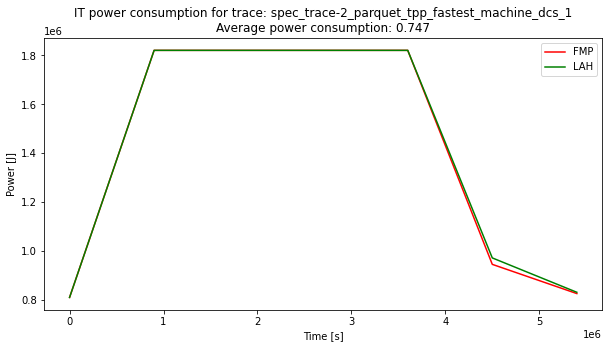

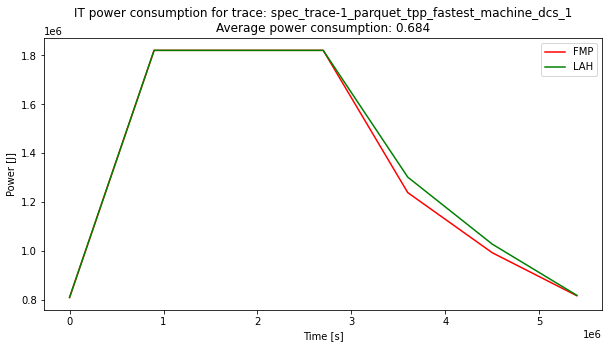

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


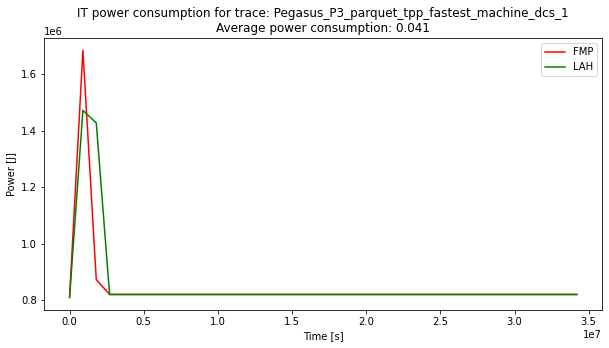

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


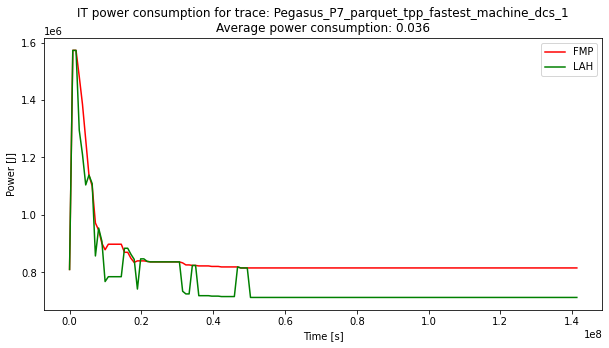

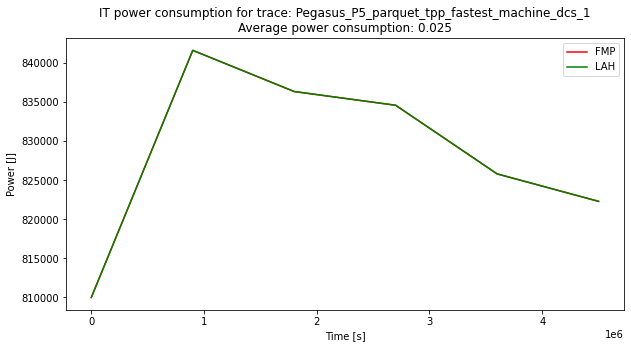

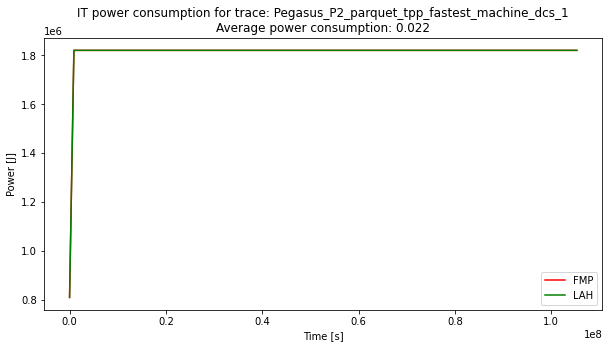

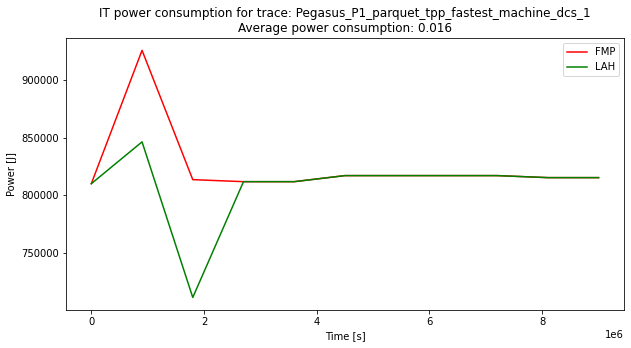

In [25]:
graph_counter = 0
for i in range(len(utilization_candidates_fmp)):
    if graph_counter > 6:
        break
    fmp_name = utilization_candidates_fmp.iloc[i]['trace_name']
    lah_name = utilization_candidates_lah.iloc[i]['trace_name']

    fmp_env = create_env_dataframe(path_ex1, fmp_name)
    lah_env = create_env_dataframe(path_ex1, lah_name)

    # fmp_env['it_power_total']

    # plot fmp and lah it power total
    if len(fmp_env) > 2:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(fmp_env['timestamp'], fmp_env['it_power_total'], color='red', label='FMP')
        ax.plot(lah_env['timestamp'], lah_env['it_power_total'], color='green', label='LAH')
        ax.set_title('IT power consumption for trace: ' + fmp_name
                      + '\nAverage power consumption: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Power [J]')
        ax.legend()
        plt.show()
        graph_counter += 1
    else:
        print('trace too short: ', fmp_name, ' ', len(fmp_env))


2.c)

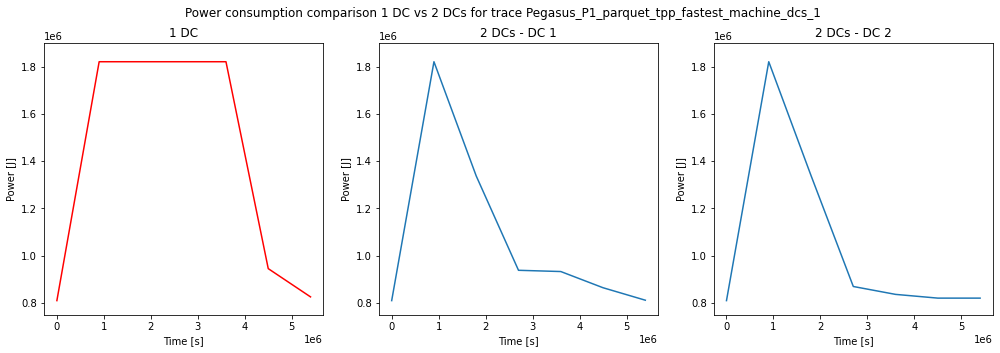

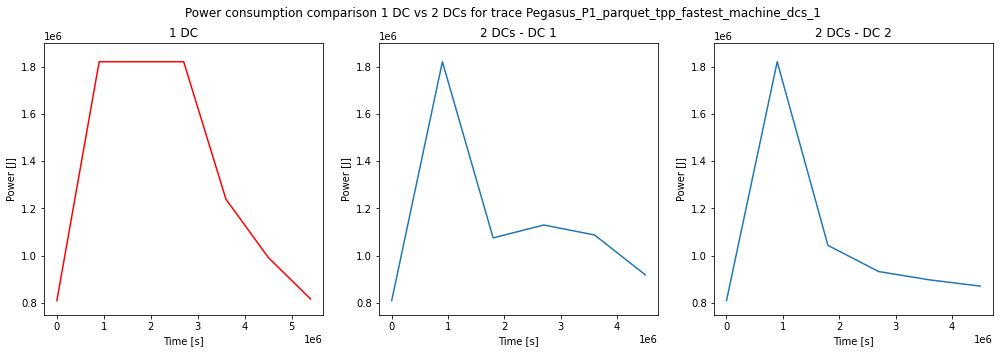

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


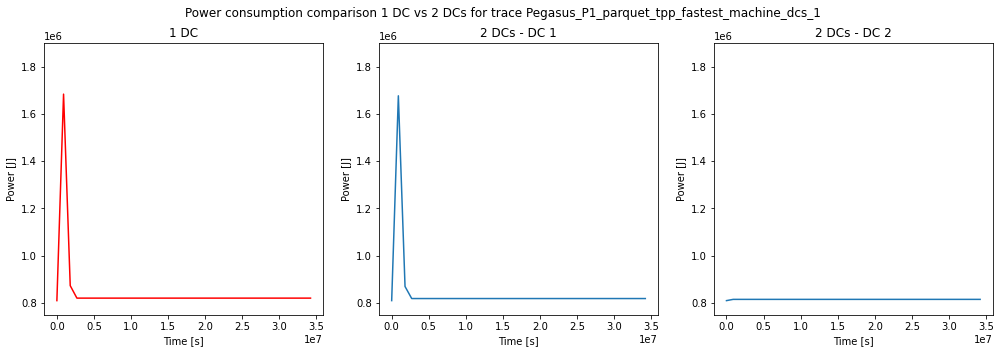

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


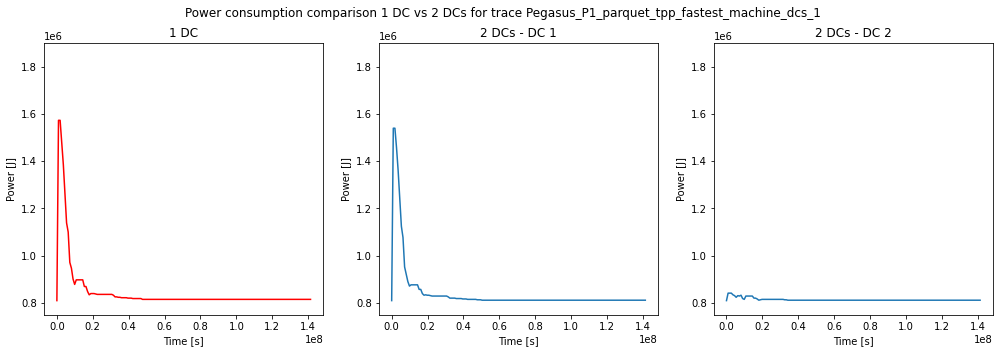

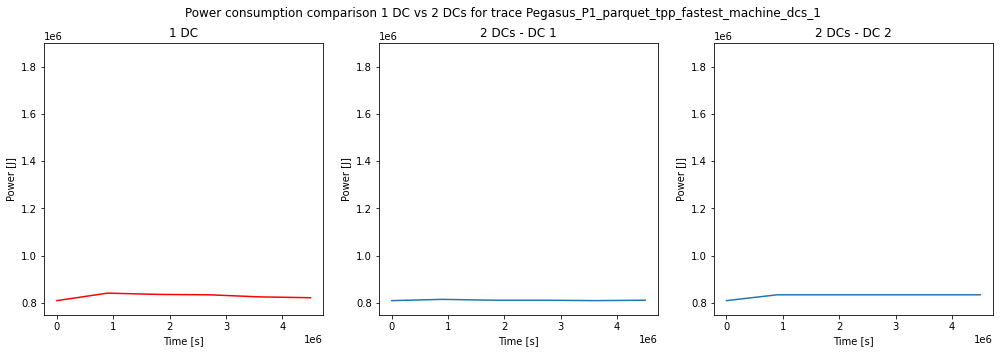

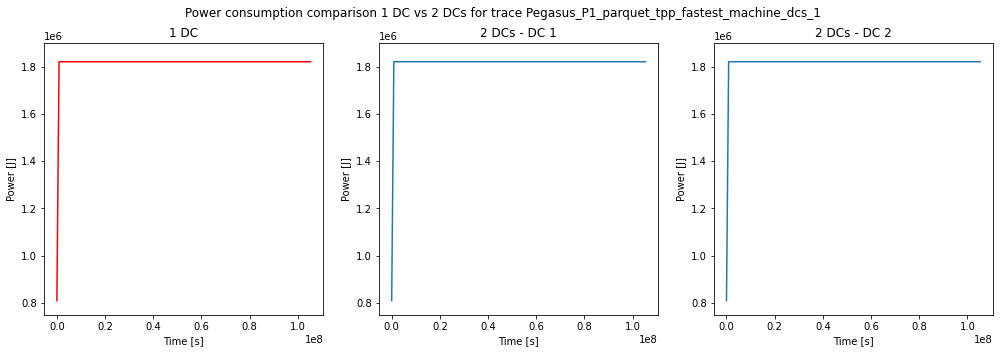

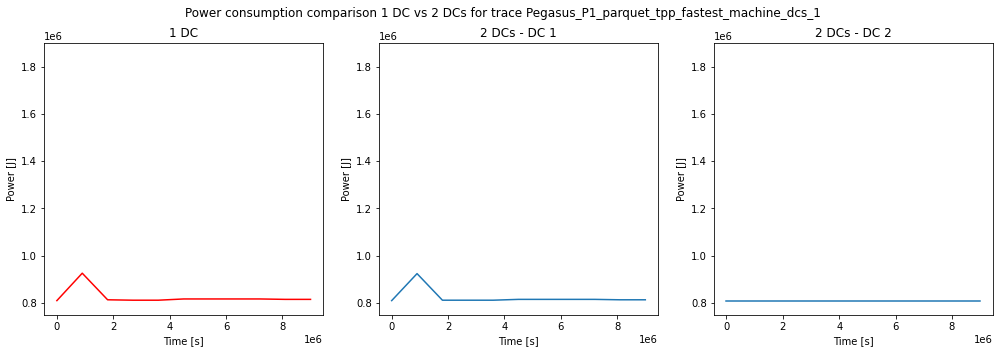

In [36]:
vs_graph_counter = 0
for i in range(len(utilization_candidates_fmp)):
    if vs_graph_counter > 6:
        break
    fmp_name_dc_1 = utilization_candidates_fmp.iloc[i]['trace_name']
    fmp_name_dc_2 = utilization_candidates_fmp.iloc[i]['trace_name'][:-1] + '2'
    
    fmp_env_dc_1 = create_env_dataframe(path_ex1, fmp_name_dc_1)
    fmp_env_dc_2 = create_env_dataframe(path_ex1, fmp_name_dc_2)

    # fmp_env['it_power_total']

    # plot fmp and lah it power total
    if len(fmp_env_dc_1) > 2:
        fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(17, 5))
        ax.plot(fmp_env_dc_1['timestamp'], fmp_env_dc_1['it_power_total'], color='red', label='FMP')
        ax1.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['it_power_total'])
        ax2.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['it_power_total'])
        # ax.set_title('IT power consumption for trace: ' + fmp_name[:-1]
        #               + '\nAverage power consumption: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
        # ax.set_xlabel('Time [s]')
        # ax.set_ylabel('Power [J]')
        # ax.legend()
        ax.set_title('1 DC')
        ax1.set_title('2 DCs - DC 1')
        ax2.set_title('2 DCs - DC 2')
        
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Power [J]')
        ax1.set_xlabel('Time [s]')
        ax1.set_ylabel('Power [J]')
        ax2.set_xlabel('Time [s]')
        ax2.set_ylabel('Power [J]')

        ax.set_ylim(750000, 1900000)
        ax1.set_ylim(750000, 1900000)
        ax2.set_ylim(750000, 1900000)
        
        fig.suptitle('Power consumption comparison 1 DC vs 2 DCs for trace ' + fmp_name)
        plt.show()
        
        vs_graph_counter += 1
    else:
        print('trace too short: ', fmp_name_dc_1, ' ', len(fmp_env_dc_1))

2.d)

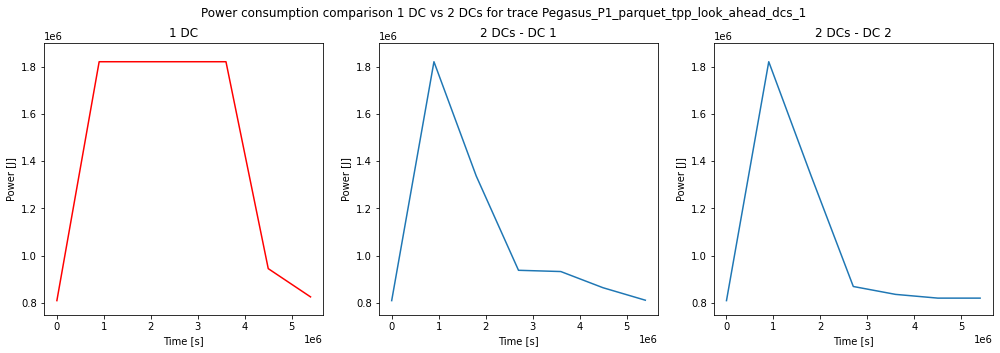

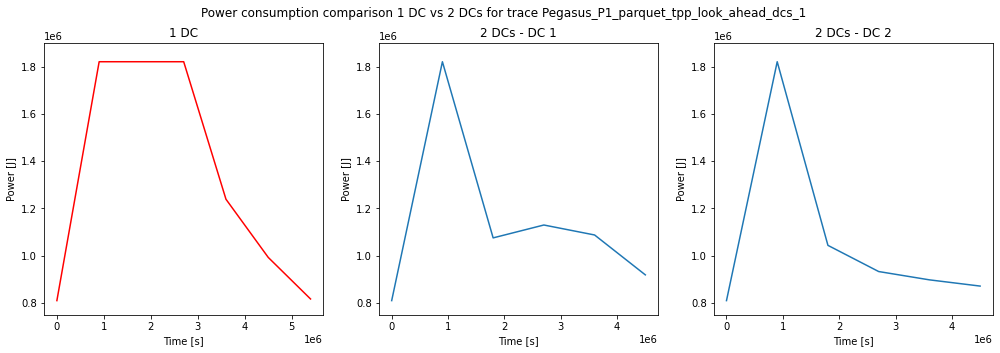

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


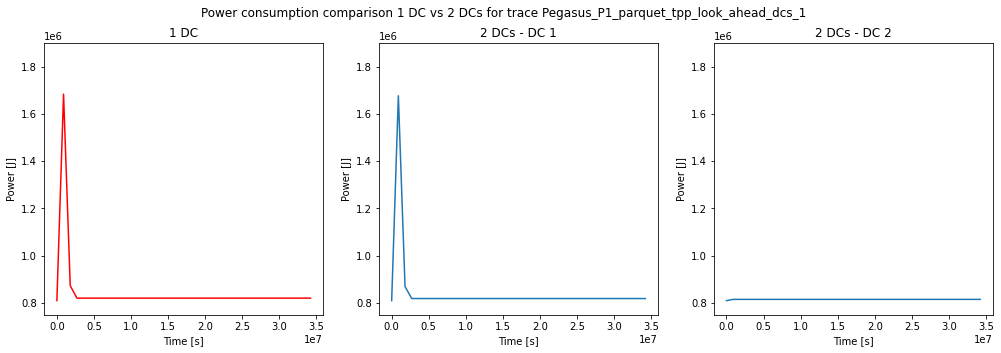

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


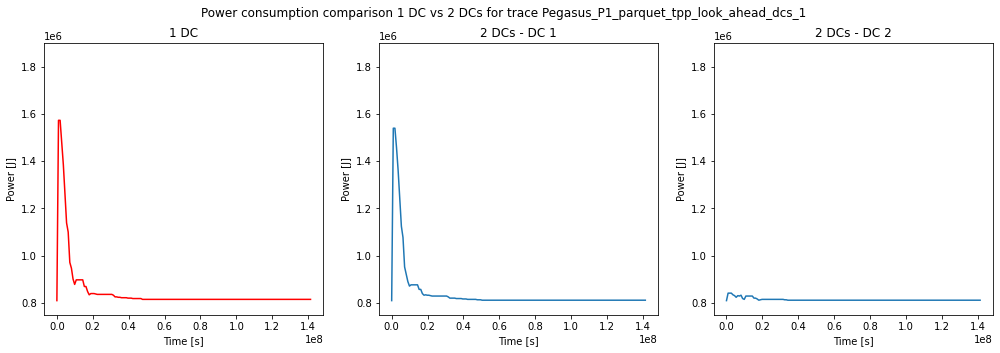

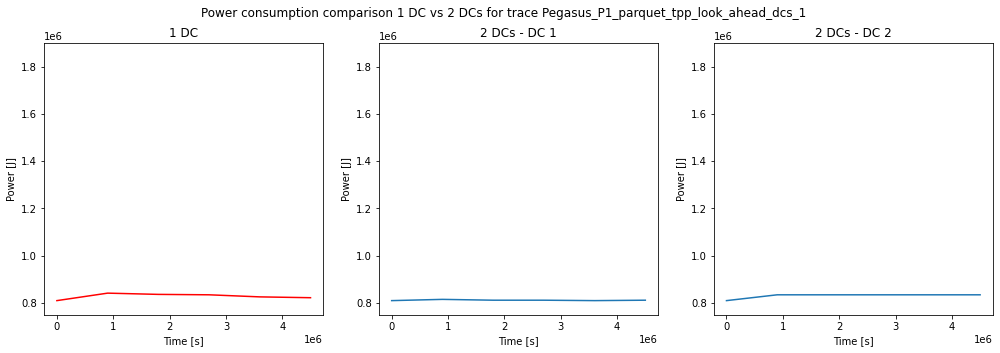

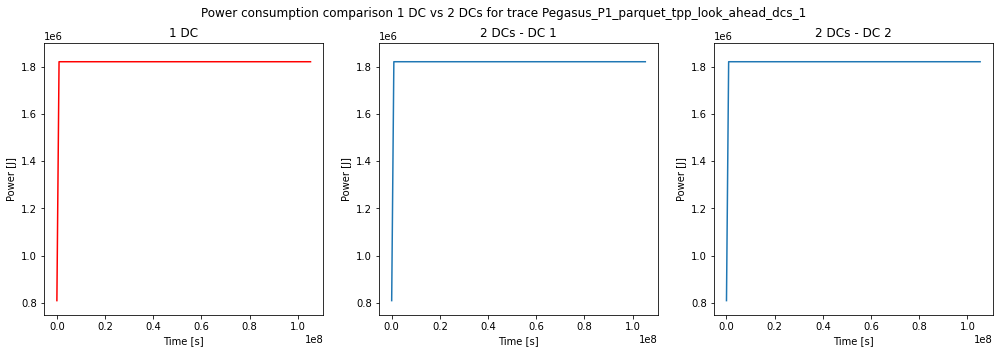

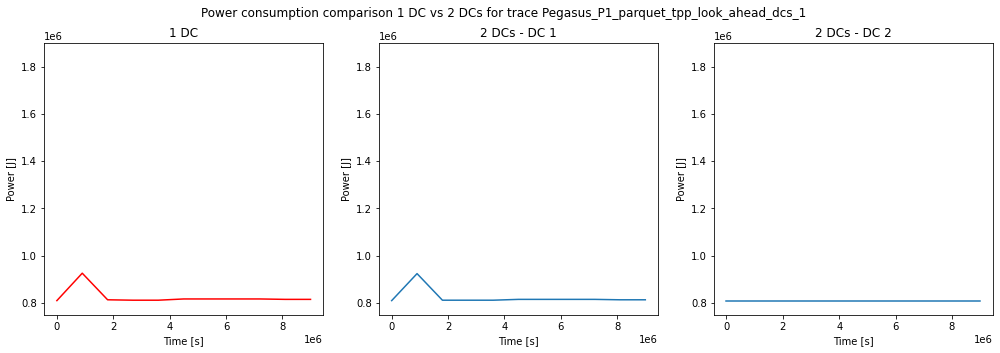

In [37]:
vs_graph_counter = 0
for i in range(len(utilization_candidates_fmp)):
    if vs_graph_counter > 6:
        break
    lah_name_dc_1 = utilization_candidates_fmp.iloc[i]['trace_name']
    lah_name_dc_2 = utilization_candidates_fmp.iloc[i]['trace_name'][:-1] + '2'
    
    lah_env_dc_1 = create_env_dataframe(path_ex1, lah_name_dc_1)
    lah_env_dc_2 = create_env_dataframe(path_ex1, lah_name_dc_2)

    # fmp_env['it_power_total']

    # plot fmp and lah it power total
    if len(lah_env_dc_1) > 2:
        fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(17, 5))
        ax.plot(lah_env_dc_1['timestamp'], lah_env_dc_1['it_power_total'], color='red', label='LAH')
        ax1.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['it_power_total'])
        ax2.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['it_power_total'])
        # ax.set_title('IT power consumption for trace: ' + lah_name[:-1]
        #               + '\nAverage power consumption: ' + utilization_candidates_lah.iloc[i]['AvgResourceUsage'].astype(str))
        # ax.set_xlabel('Time [s]')
        # ax.set_ylabel('Power [J]')
        # ax.legend()
        ax.set_title('1 DC')
        ax1.set_title('2 DCs - DC 1')
        ax2.set_title('2 DCs - DC 2')
        
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Power [J]')
        ax1.set_xlabel('Time [s]')
        ax1.set_ylabel('Power [J]')
        ax2.set_xlabel('Time [s]')
        ax2.set_ylabel('Power [J]')

        ax.set_ylim(750000, 1900000)
        ax1.set_ylim(750000, 1900000)
        ax2.set_ylim(750000, 1900000)
        
        fig.suptitle('Power consumption comparison 1 DC vs 2 DCs for trace ' + lah_name)
        plt.show()
        vs_graph_counter += 1
    else:
        print('trace too short: ', lah_name_dc_1, ' ', len(lah_env_dc_1))

# Analysis

In [28]:
avg_res_10 = stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.05].trace_name.values
avg_res_10

array(['spec_trace-1_parquet_tpp_fastest_machine_dcs_1',
       'spec_trace-1_parquet_tpp_look_ahead_dcs_1',
       'spec_trace-2_parquet_tpp_fastest_machine_dcs_1',
       'spec_trace-2_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_look_ahead_dcs_1',
       'workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1',
       'workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tp

In [29]:
wawa = create_dataframe(path_ex1, 'environment.csv')
wawa

,timestamp,host_id,it_power_total,trace_name
0,2930096,0-0,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
0,2930096,0-0,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
1,2930096,1-1,810000.0000,askalon-new_ee10_parquet_tpp_fastest_machine_d...
0,2930096,0-0,707940.0000,askalon-new_ee10_parquet_tpp_look_ahead_dcs_1
0,2930096,0-0,707940.0000,askalon-new_ee10_parquet_tpp_look_ahead_dcs_2
...,...,...,...,...
101,45000000,1-1,810000.0000,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
102,45900000,0-0,714085.3125,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
103,45900000,1-1,810000.0000,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...
104,46800000,0-0,714085.3125,workflowhub_soykb_grid5000_schema-0-2_soykb-g5...


In [30]:
wawa[wawa['trace_name'] == 'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1']
# wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].plot(x='timestamp', y='it_power_total')

# line1 = plt.plot([1, 3, 5, 2, 5, 3, 1], c='red', lw=5)
# line2 = plt.plot([7, 2, 5, 7, 5, 2, 7], c='green', lw=5)
# plt.show()

# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].it_power_total, c='red', alpha=0.5)
# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].it_power_total, c='blue', alpha=0.5)
# plt.show()

,timestamp,host_id,it_power_total,trace_name
0,0,0-0,810000.0,workflowhub_epigenomics_dataset-hep_grid5000_s...


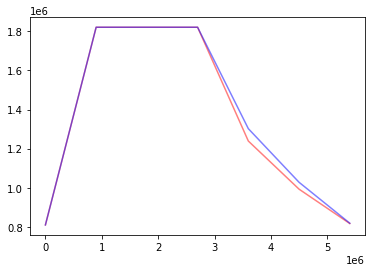

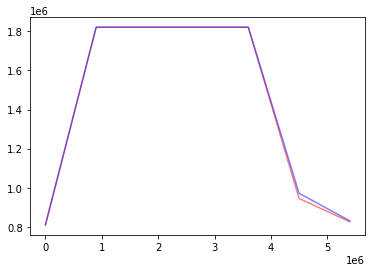

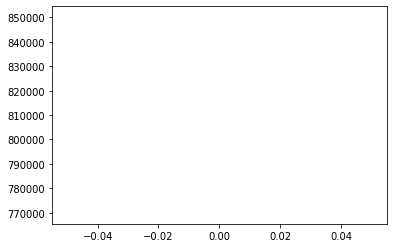

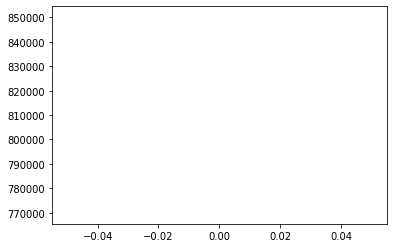

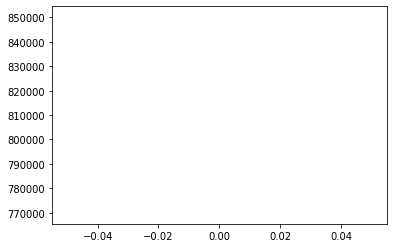

In [31]:
for i in range(0, len(avg_res_10)):
    if i % 2 == 1: continue
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='red')
    i += 1
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='blue')
    plt.show()